# Cluster Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load data
import seaborn as sns
iris = sns.load_dataset('iris')

In [4]:
# X only dataframe
DF = iris.iloc[:, :-1].copy()
DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-means Clustering

### 1) Modeling
- n_clusters : 군집 개수 지정
- init : 초기 중심 설정 방식(기본값)
- max_iter : 최대 반복 횟수

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, 
                  init ='k-means++', 
                  max_iter = 15, 
                  random_state = 2045)

kmeans_3.fit(DF)

KMeans(max_iter=15, n_clusters=3, random_state=2045)

### 2) Clustering Results

In [7]:
kmeans_3.n_iter_ 

5

In [8]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
kmeans_3.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
kmeans_3.inertia_ 

78.85144142614601

### 3) Scree plot

In [11]:
# k 군집 분석
inertia = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(DF)
    inertia.append(kmeanModel.inertia_)

In [12]:
inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 41.840300724637686,
 34.299712121212124,
 29.988943950786055,
 28.456094748388868]

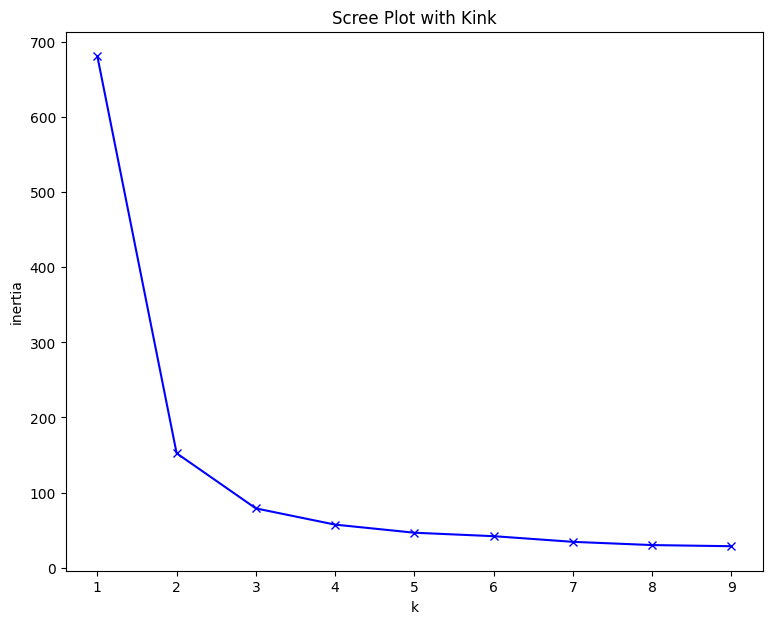

In [23]:
# Plot the elbow
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()